In [213]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [118]:
cwd = os.getcwd()
data_dir = os.path.join(cwd, "CUB_200_2011/CUB_200_2011")
img_dir = os.path.join(data_dir, "images")
num_classes = 200
reshape_h, reshape_w = 128, 128

In [113]:
os.listdir(data_dir)
def load_doc(doc_dir, split="\n"):
    with open(doc_dir, 'r') as f:
        text = f.read()
    return text.split(split)
def classes_to_dict(class_list):
    class_dict = dict()
    for cls in class_list:
        label, name = cls.split()
        class_dict[label] = name.split('.')[1]
    return class_dict

In [130]:
image_names_dir = os.path.join(data_dir, 'images.txt')
bbox_dir = os.path.join(data_dir, 'bounding_boxes.txt')
image_class_labels_dir = os.path.join(data_dir, 'image_class_labels.txt')
classes_dir = os.path.join(data_dir, 'classes.txt')

image_names = load_doc(image_names_dir)
bboxes = load_doc(bbox_dir)
image_class_labels = load_doc(image_class_labels_dir)
classes = load_doc(classes_dir)
class_dict = classes_to_dict(classes[:num_classes])

In [209]:
len(image_names), len(bboxes), len(image_class_labels)

(11789, 11789, 11789)

In [201]:
class_dict

{'1': 'Black_footed_Albatross',
 '2': 'Laysan_Albatross',
 '3': 'Sooty_Albatross',
 '4': 'Groove_billed_Ani',
 '5': 'Crested_Auklet',
 '6': 'Least_Auklet',
 '7': 'Parakeet_Auklet',
 '8': 'Rhinoceros_Auklet',
 '9': 'Brewer_Blackbird',
 '10': 'Red_winged_Blackbird',
 '11': 'Rusty_Blackbird',
 '12': 'Yellow_headed_Blackbird',
 '13': 'Bobolink',
 '14': 'Indigo_Bunting',
 '15': 'Lazuli_Bunting',
 '16': 'Painted_Bunting',
 '17': 'Cardinal',
 '18': 'Spotted_Catbird',
 '19': 'Gray_Catbird',
 '20': 'Yellow_breasted_Chat',
 '21': 'Eastern_Towhee',
 '22': 'Chuck_will_Widow',
 '23': 'Brandt_Cormorant',
 '24': 'Red_faced_Cormorant',
 '25': 'Pelagic_Cormorant',
 '26': 'Bronzed_Cowbird',
 '27': 'Shiny_Cowbird',
 '28': 'Brown_Creeper',
 '29': 'American_Crow',
 '30': 'Fish_Crow',
 '31': 'Black_billed_Cuckoo',
 '32': 'Mangrove_Cuckoo',
 '33': 'Yellow_billed_Cuckoo',
 '34': 'Gray_crowned_Rosy_Finch',
 '35': 'Purple_Finch',
 '36': 'Northern_Flicker',
 '37': 'Acadian_Flycatcher',
 '38': 'Great_Crested_Flyc

In [210]:
def load_data():
    images = np.zeros(shape=(1,128,128,3), dtype='uint8')
    bbox = np.zeros(shape=(1,4), dtype='uint8')
    label = np.zeros(shape=(1))

    for i in range(len(image_names)-1):
        img = cv2.cvtColor(cv2.imread(data_dir + "/images/" + image_names[i].split()[1]), cv2.COLOR_BGR2RGB)
        box = [float(dim) for dim in bboxes[i].split()[1:]]
        img_h, img_w, num_channels = img.shape
        shrink_ratio_h, shrink_ratio_w = img_h/ reshape_h, img_w/reshape_w
        img = cv2.resize(img, (reshape_h, reshape_w))
        x, w = int(box[0]/shrink_ratio_w), int(box[2]/shrink_ratio_w)
        y, h = int(box[1]/shrink_ratio_h), int(box[3]/shrink_ratio_h)

        images = np.vstack((images, img.reshape(1,reshape_h,reshape_w,3)))
        bbox = np.vstack((bbox, np.array([[x,y,w,h]])))
        label = np.hstack((label, class_dict[image_class_labels[i].split()[1]]))
        
        if (i+1) % 1000 == 0:
            print(int(i+1), " done")
    return images[1:], bbox[1:], label[1:]

In [211]:
images, bbox, labels = load_data()

1000  done
2000  done
3000  done
4000  done
5000  done
6000  done
7000  done
8000  done
9000  done
10000  done
11000  done


In [214]:
data = {'images':images, 'bbox':bbox, 'labels':labels}

In [215]:
f = open(data_dir+'/data', 'wb')
pickle.dump(data, f)

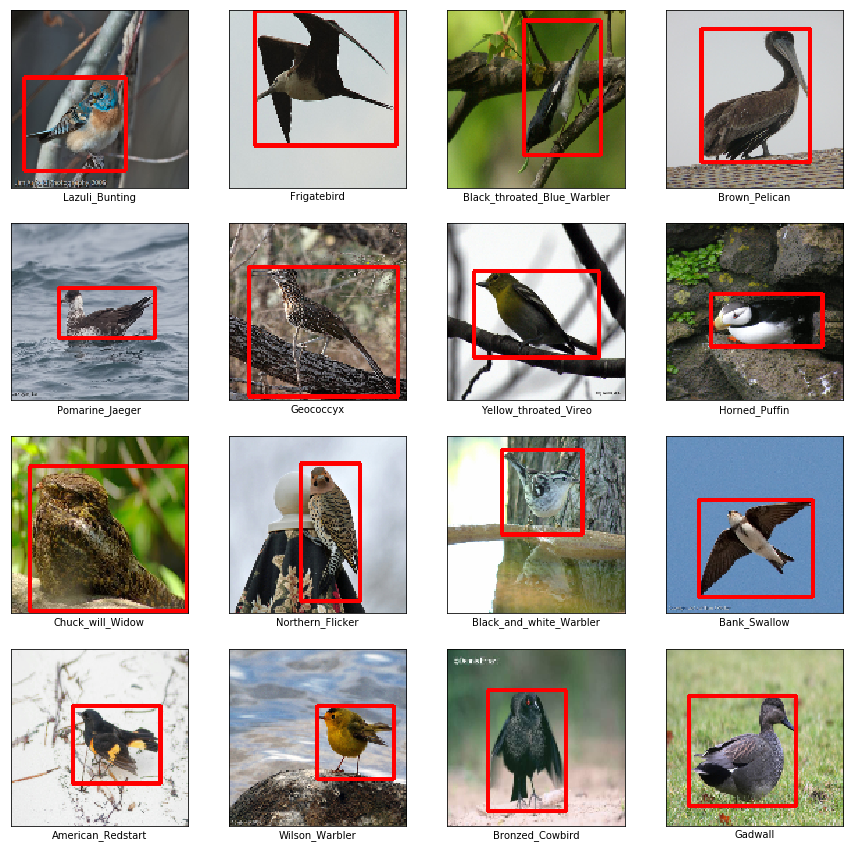

In [220]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

for i, ax in enumerate(axes.flat):
    idx = np.random.choice(len(images))
    x,y,w,h = bbox[idx]
    img = images[idx]
    cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(labels[idx])